# Intro

## Task

Предсказать с помощью линейной регрессии цену дома по остальным параметрам

## Imports

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import statsmodels.formula.api as sf

## Data legend

CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per $10,000  
PTRATIO - pupil-teacher ratio by town  
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town   
LSTAT - % of lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's  



# Main

In [4]:
df = pd.read_csv('./data/2_housing_data.csv')

df.columns = list(map(lambda x: x.lower(), df.columns))
df['medv'] = df.medv * 1000 # price in $
df['nox'] = df.nox * 10 # concetration (parts per 1000 million)

In [43]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36200.0


In [44]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22532.806324
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5000.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17025.000000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21200.000000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50000.000000


## Age

<AxesSubplot:xlabel='age', ylabel='medv'>

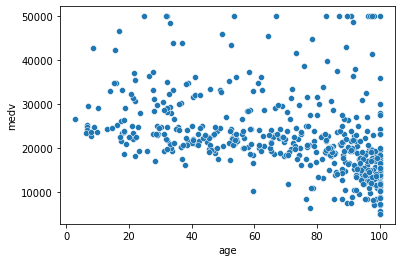

In [48]:
sns.scatterplot(data=df, x='age', y='medv')

фактор age обьясняет стоимость, но влиянию мешают выбросы с большой ценой  
Гипотеза - что это премиум старые дома когда старость это наоборот престижно. Предиктор влияет на цену, если убрать эти выбросы  
  
Как вариант решения: добавить предиктор как то разеляющий эти выбросы и остальные данные (is_old_home?) и включить в модель взаимодействие этих факторов, чтобы влияние возраста ВНЕ этих выбросов корректно посчиталось

## EDA with regression

### preps 

In [15]:
target = 'medv'

Colormaps (cmaps)
https://matplotlib.org/stable/tutorials/colors/colormaps.html  


<AxesSubplot:>

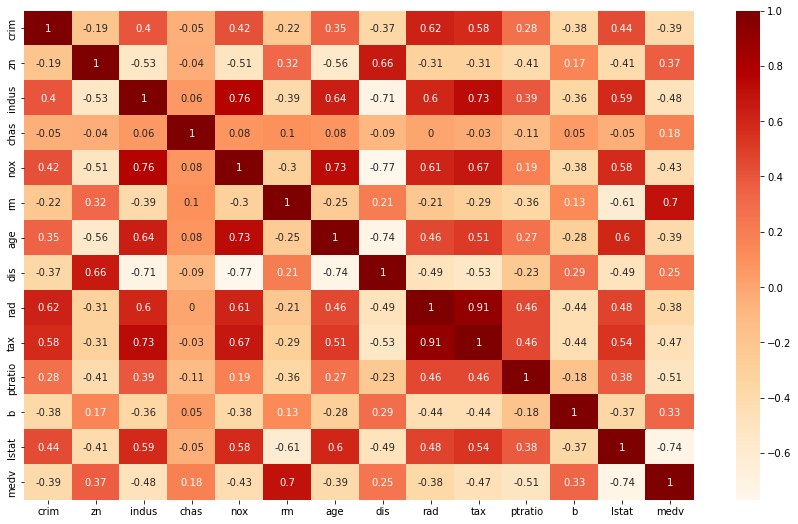

In [61]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr().round(2), annot=True, cmap="OrRd")

In [72]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,5.38,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,4.69,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,4.69,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,4.58,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,4.58,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36200.0


In [73]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

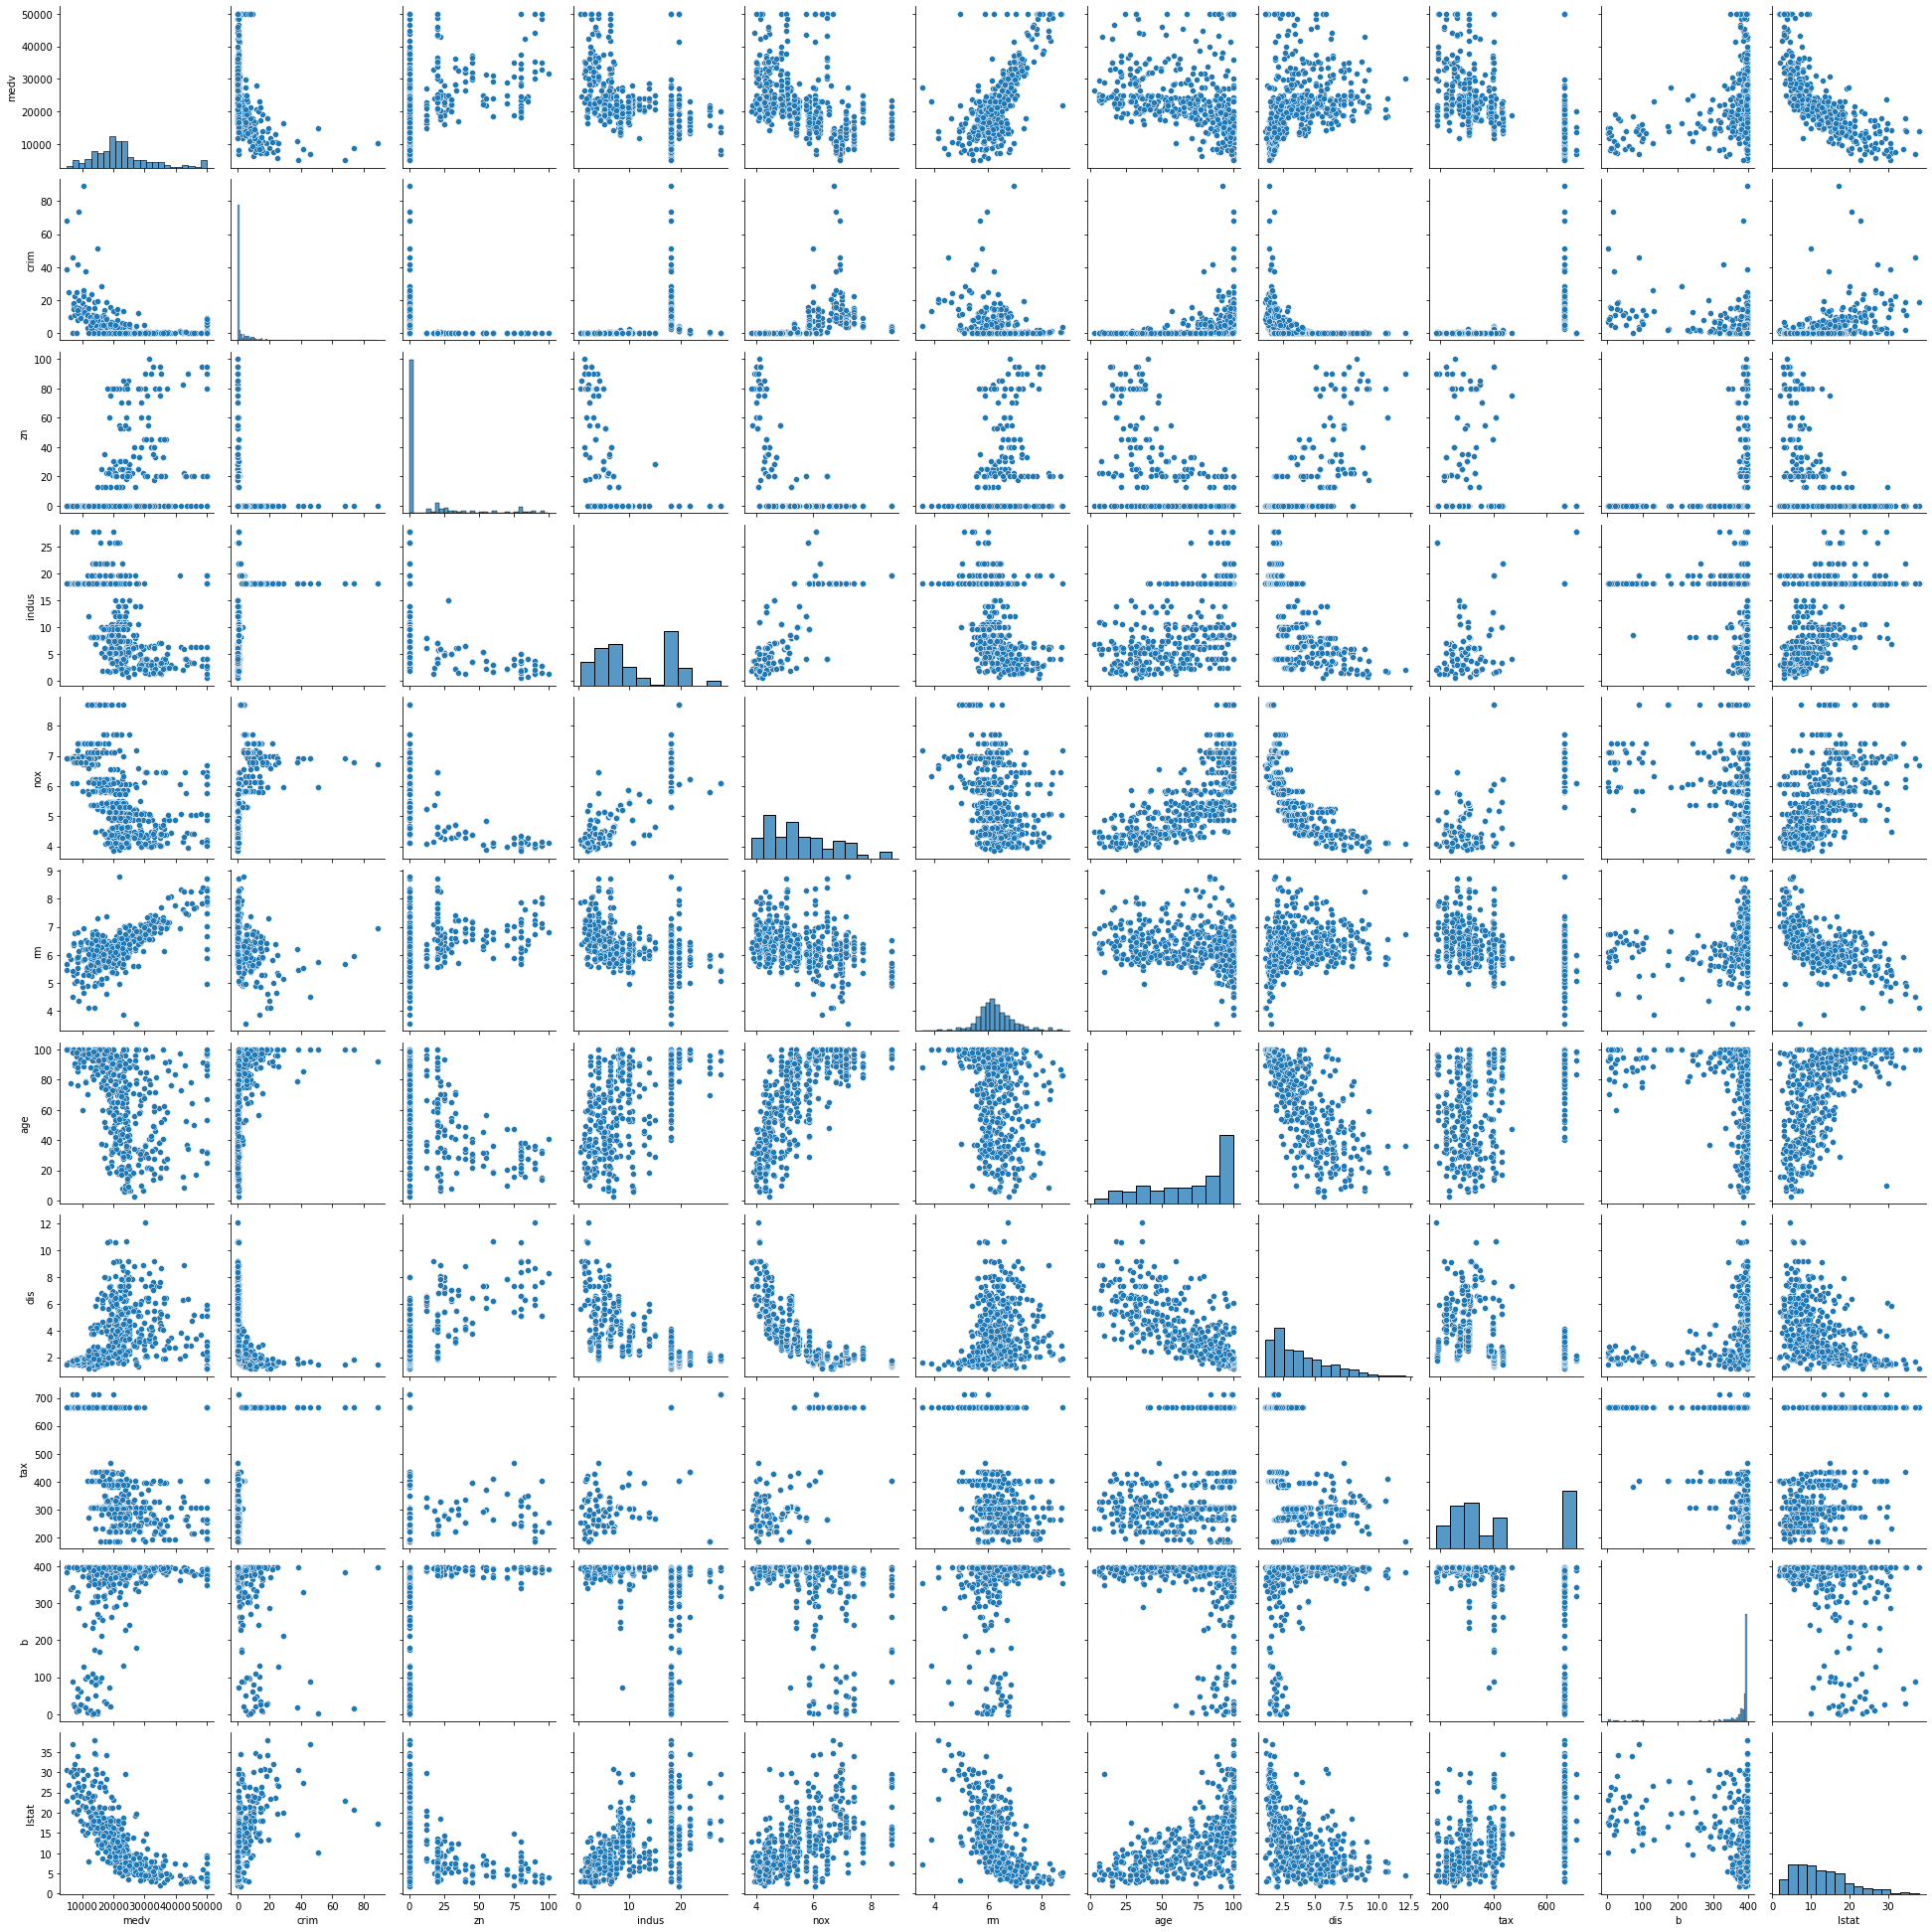

In [74]:
sns.pairplot(
    data=df[['medv', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'b', 'lstat']]
)

### regression

Next steps:
1. business prioritize stat significant features

all predictors

<AxesSubplot:>

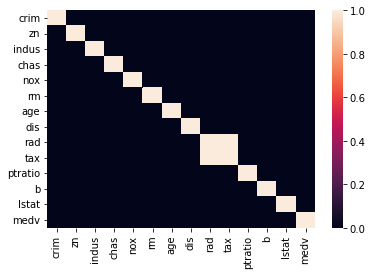

In [25]:
sns.heatmap(df.corr() > 0.9)

In [55]:
model = sf.ols('medv ~ crim + zn + indus + C(chas) + nox + rm + age + dis + rad + tax + ptratio + b + lstat', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     96.29
Date:                Fri, 05 Nov 2021   Prob (F-statistic):          1.75e-111
Time:                        18:08:11   Log-Likelihood:                -3865.1
No. Observations:                 394   AIC:                             7758.
Df Residuals:                     380   BIC:                             7814.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.268e+04   5681.290      5.

In [50]:
print('MSE: {:,.0f}'.format(model.mse_model))

MSE: 2,115,380,143


Seems like optimal model is model with all predictors (max R squared)  
All predictors are statistically significant  
Mullticollinearity warnings is present, but condition number is not so big (referring to NHL analysis from kaggle: https://www.kaggle.com/lukewiebolt/nhl-player-salary-multiple-regression) + std errors are not too big for such amount of experimental data